In [1]:
import numpy as np
import pandas as pd
import sklearn.linear_model as lm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [3]:
data = pd.read_csv("drive/MyDrive/Colab Notebooks/Crop_recommendation.csv")

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [5]:
data.head(5)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


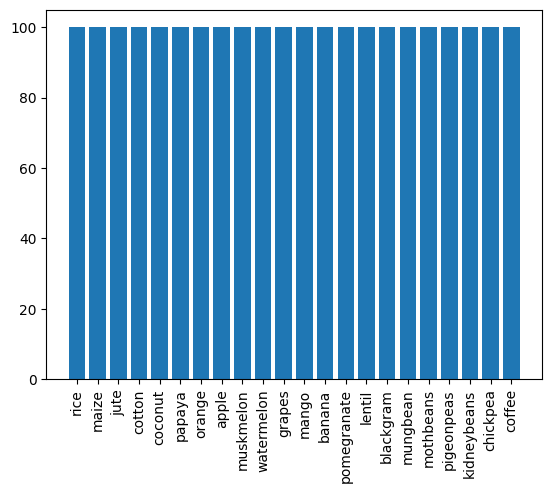

In [6]:
counts = data['label'].value_counts()

plt.bar(counts.index, counts.values);
plt.xticks(rotation=90);

Index(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas', 'mothbeans',
       'mungbean', 'blackgram', 'lentil', 'pomegranate', 'banana', 'mango',
       'grapes', 'watermelon', 'muskmelon', 'apple', 'orange', 'papaya',
       'coconut', 'cotton', 'jute', 'coffee'],
      dtype='object')


<Axes: >

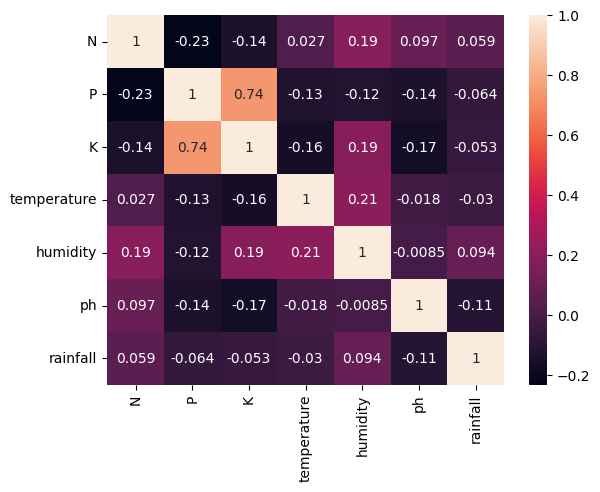

In [7]:
X = data.drop("label", axis=1)
y, y_label = pd.factorize(data["label"])

X_no_NPK = X.drop("N", axis=1).drop("P", axis=1).drop("K", axis=1)
print(y_label)
sns.heatmap(X.corr(), annot=True)

In [8]:
numbers_to_labels = {i:y_label[i] for i in range(len(y_label))}
print(numbers_to_labels)

{0: 'rice', 1: 'maize', 2: 'chickpea', 3: 'kidneybeans', 4: 'pigeonpeas', 5: 'mothbeans', 6: 'mungbean', 7: 'blackgram', 8: 'lentil', 9: 'pomegranate', 10: 'banana', 11: 'mango', 12: 'grapes', 13: 'watermelon', 14: 'muskmelon', 15: 'apple', 16: 'orange', 17: 'papaya', 18: 'coconut', 19: 'cotton', 20: 'jute', 21: 'coffee'}


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_no_NPK_train, X_no_NPK_test, y_no_NPK_train, y_no_NPK_test = train_test_split(X_no_NPK, y, test_size=0.2)

In [10]:
classifier = RandomForestClassifier(max_depth=5, random_state=0)
classifier_no_NPK = RandomForestClassifier(max_depth=5, random_state=0)

In [11]:
classifier.fit(X_train, y_train)
classifier_no_NPK.fit(X_no_NPK_train, y_no_NPK_train)

RandomForestClassifier(max_depth=5, random_state=0)

In [12]:
y_pred = classifier.predict(X_test)
y_no_NPK_pred = classifier_no_NPK.predict(X_no_NPK_test)

In [13]:
accuracy_score(y_test, y_pred)

0.9863636363636363

In [14]:
accuracy_score(y_no_NPK_test, y_no_NPK_pred)

0.9136363636363637

In [15]:
import joblib

In [16]:
dump_data ={
    "numbers_to_labels" : numbers_to_labels,
    "model":classifier,
    "model_no_NPK":classifier_no_NPK
}

In [18]:
joblib.dump(dump_data,"sample_data/Crop_RandomForest_Classifier_V1.pkl")

['sample_data/Crop_RandomForest_Classifier_V1.pkl']